In [ ]:
#gohil happy
#21IM30006
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import seaborn
import seaborn as sns

In [ ]:
path = 'Iris.csv'
df = pd.read_csv(path)

In [ ]:
df.drop('Id',axis=1,inplace=True)
print(df.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
for feature in df.columns:
    print(feature)
    print(f'_'*100)
    print(df[feature].unique())

SepalLengthCm
____________________________________________________________________________________________________
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalWidthCm
____________________________________________________________________________________________________
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PetalLengthCm
____________________________________________________________________________________________________
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PetalWidthCm
____________________________________________________________________________________________________
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Species
_____________________________

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
X.shape
y = pd.to_numeric(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_v, X_test, y_v, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_v = scaler.transform(X_v)


In [ ]:
def prediction(X,w):
    return np.exp(np.dot(X,w))/np.sum(np.exp(np.dot(X,w)),axis=1).reshape(-1,1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Define the logistic regression function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def one_hot_encode(y, num_classes):
    one_hot = np.zeros((len(y), num_classes))
    for i in range(len(y)):
        one_hot[i, y[i]] = 1
    return one_hot

def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

def predict(X, weights):
    return softmax(np.dot(X,weights))

def train_logistic_regression(X, y, num_classes, learning_rate, num_epochs=50, batch_size=30):
# Add bias term

    num_samples, num_features = X.shape
    weights = np.zeros((num_features, num_classes))

    for epoch in range(num_epochs):
        for i in range(0, num_samples, batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Compute the softmax predictions
            y_pred = predict(X_batch, weights)

            # Compute the gradient of the loss
            error = y_pred - y_batch
            gradient = X_batch.T.dot(error) / batch_size

            # Update weights
            weights -= learning_rate * gradient

    return weights

def evaluate_logistic_regression(X_test, y_test, weights):
    X_test = scaler.transform(X_test)

    y_pred = predict(X_test, weights)

    # Convert the predicted probabilities to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_labels)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_labels)

    # Calculate precision, recall, and F1-score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='macro')

    return accuracy, conf_matrix, precision, recall, f1




In [ ]:
learning_rate = [1e-5, 1e-4, 1e-3, 1e-2, 0.05, 0.1]
accuracy_list = []
for lr in learning_rate:
    num_classes = len(np.unique(y_train))
    y_train_encoded = one_hot_encode(y_train, num_classes)
    weights = train_logistic_regression(X = X_train, y= y_train_encoded, num_classes = 3, learning_rate = lr, num_epochs=50, batch_size=30)

    # Evaluate the model
    y_test_encoded = one_hot_encode(y_test,3)
    accuracy, conf_matrix, precision, recall, f1 = evaluate_logistic_regression(X_test, y_test, weights)

    accuracy_list.append(accuracy)

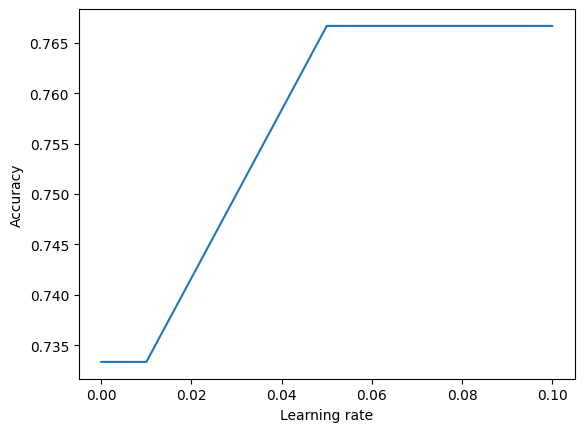

In [ ]:
plt.plot(learning_rate,accuracy_list)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
lr_accu = pd.DataFrame()
lr_accu['lr'] = pd.Series(learning_rate)
lr_accu['accuracy'] = pd.Series(accuracy_list)

In [ ]:
print("optimal learning rates are: ")
print(lr_accu.loc[lr_accu['accuracy']== max(lr_accu['accuracy'])])

optimal learning rates are: 
     lr  accuracy
4  0.05  0.766667
5  0.10  0.766667


# experiment 2

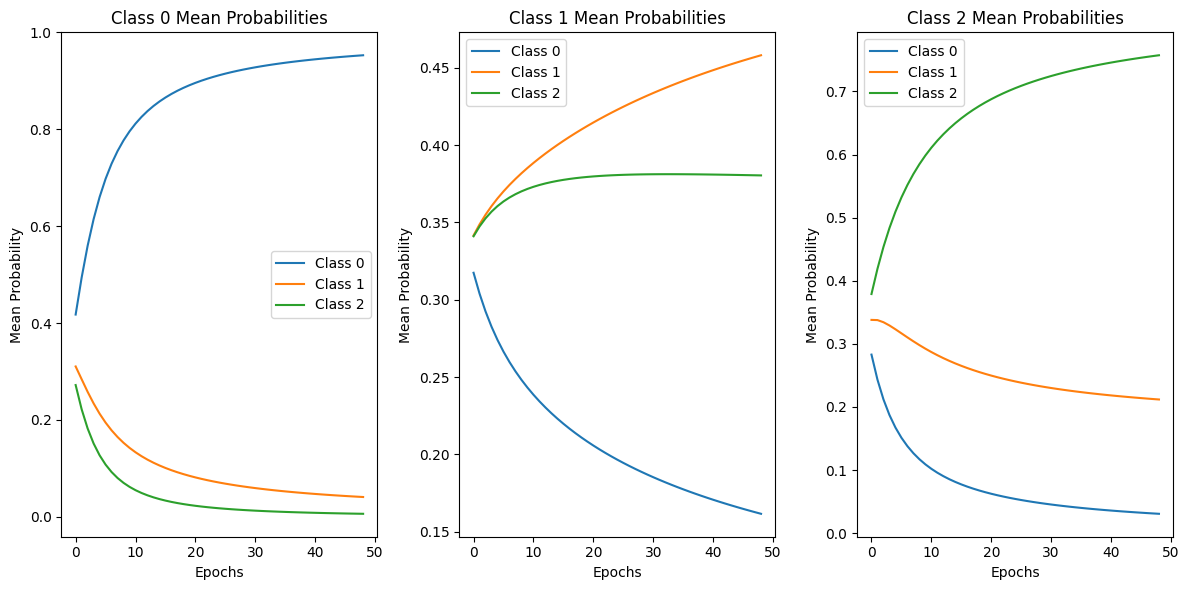

In [ ]:
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]
class_2_indices = np.where(y_train == 2)[0]

mean_probs_class_0 = []
mean_probs_class_1 = []
mean_probs_class_2 = []

def train_logistic_regression(X, y, num_classes, learning_rate, num_epochs=50, batch_size=30): # Add bias term

    num_samples, num_features = X.shape
    weights = np.zeros((4, 3))

    for epoch in range(num_epochs):
        for i in range(0, num_samples, batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Compute the softmax predictions
            y_pred = predict(X_batch, weights)

            # Compute the gradient of the loss
            error = y_pred - y_batch
            gradient = X_batch.T.dot(error) / batch_size

            # Update weights
            weights -= learning_rate * gradient
        probs_class_0 = predict(X_train[class_0_indices], weights)
        probs_class_1 = predict(X_train[class_1_indices], weights)
        probs_class_2 = predict(X_train[class_2_indices], weights)

        mean_probs_class_0.append(np.mean(probs_class_0, axis=0))
        mean_probs_class_1.append(np.mean(probs_class_1, axis=0))
        mean_probs_class_2.append(np.mean(probs_class_2, axis=0))

        # Plot the mean probabilities vs. epochs for each class in each subset
    plt.figure(figsize=(12, 6))

    plt.subplot(131)
    for i in range(num_classes):
        plt.plot(range(epoch), [mp[i] for mp in mean_probs_class_0[:epoch]], label=f'Class {i}')
    plt.title('Class 0 Mean Probabilities')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Probability')
    plt.legend()

    plt.subplot(132)
    for i in range(num_classes):
        plt.plot(range(epoch), [mp[i] for mp in mean_probs_class_1[:epoch]], label=f'Class {i}')
    plt.title('Class 1 Mean Probabilities')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Probability')
    plt.legend()

    plt.subplot(133)
    for i in range(num_classes):
        plt.plot(range(epoch), [mp[i] for mp in mean_probs_class_2[:epoch]], label=f'Class {i}')
    plt.title('Class 2 Mean Probabilities')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Probability')
    plt.legend()

    plt.tight_layout()
    plt.show()
    return weights
y_train_encoded = one_hot_encode(y_train, num_classes)
weight = train_logistic_regression(X_train, y_train_encoded, num_classes=3, learning_rate=0.05)

In [ ]:
accuracy, conf_matrix, precision, recall, f1 = evaluate_logistic_regression(X_test, y_test, weights)

<Axes: >

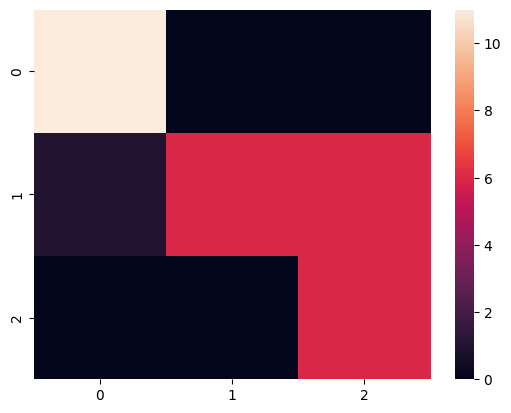

In [ ]:
sns.heatmap(conf_matrix)